### Importación de datos



In [41]:
import pandas as pd

url = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science-latam/refs/heads/main/base-de-datos-challenge1-latam/tienda_1%20.csv"
url2 = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science-latam/refs/heads/main/base-de-datos-challenge1-latam/tienda_2.csv"
url3 = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science-latam/refs/heads/main/base-de-datos-challenge1-latam/tienda_3.csv"
url4 = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science-latam/refs/heads/main/base-de-datos-challenge1-latam/tienda_4.csv"

tienda = pd.read_csv(url)
tienda2 = pd.read_csv(url2)
tienda3 = pd.read_csv(url3)
tienda4 = pd.read_csv(url4)

tienda.head()

,Producto,Categoría del Producto,Precio,Costo de envío,Fecha de Compra,Vendedor,Lugar de Compra,Calificación,Método de pago,Cantidad de cuotas,lat,lon
0,Asistente virtual,Electrónicos,164300.0,6900.0,16/01/2021,Pedro Gomez,Bogotá,4,Tarjeta de crédito,8,4.60971,-74.08175
1,Mesa de comedor,Muebles,192300.0,8400.0,18/05/2022,Beatriz Morales,Medellín,1,Tarjeta de crédito,4,6.25184,-75.56359
2,Juego de mesa,Juguetes,209600.0,15900.0,15/03/2021,Juan Fernandez,Cartagena,1,Tarjeta de crédito,1,10.39972,-75.51444
3,Microondas,Electrodomésticos,757500.0,41000.0,03/05/2022,Juan Fernandez,Cali,4,Nequi,1,3.43722,-76.52250
4,Silla de oficina,Muebles,335200.0,20200.0,07/11/2020,Maria Alfonso,Medellín,5,Nequi,1,6.25184,-75.56359


#1. Análisis de facturación



In [50]:
# CÁLCULO DE LA RENTABILIDAD: GANANCIA BRUTA
# ----------------------------------------------------
# CORRECCIÓN: La ganancia es el Precio - Costo de envío. El número de cuotas NO multiplica la ganancia.
df['Ganancia_Bruta'] = df['Precio'] - df['Costo de envío']

# ANÁLISIS POR TIENDA USANDO LA NUEVA MÉTRICA
# ----------------------------------------------------
ganancia_por_tienda = df.groupby('tienda')['Ganancia_Bruta'].sum().sort_values(ascending=False)

print("Ganancia Bruta Total por Tienda (en millones):")
print(ganancia_por_tienda / 1_000_000) # Se divide por 1 millón para mostrar valores más legibles

Ganancia Bruta Total por Tienda (en millones):
tienda
tienda_1    1089.5025
tienda_2    1056.8584
tienda_3    1039.5030
tienda_4     983.0583
Name: Ganancia_Bruta, dtype: float64


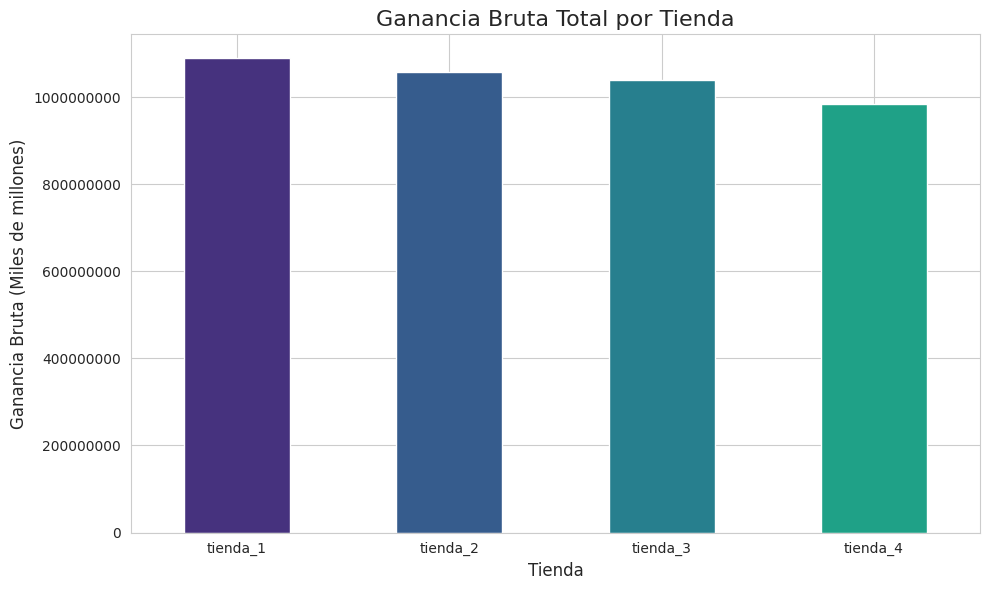

In [51]:
import matplotlib.pyplot as plt
import seaborn as sns

# Configuración básica para los gráficos
plt.figure(figsize=(10, 6))
sns.set_style("whitegrid")

# Crear un gráfico de barras para la Ganancia Bruta
ganancia_por_tienda.plot(kind='bar', color=sns.color_palette("viridis"))
plt.title('Ganancia Bruta Total por Tienda', fontsize=16)
plt.ylabel('Ganancia Bruta (Miles de millones)', fontsize=12)
plt.xlabel('Tienda', fontsize=12)
plt.xticks(rotation=0) # Etiquetas horizontales
plt.ticklabel_format(style='plain', axis='y') # Quitar notación científica si es muy alta
plt.tight_layout()
plt.show()

La Tienda 1 sigue siendo la más rentable. La Tienda 4 es la que menos dinero gana, confirmando su bajo desempeño.

# 2. Ventas por categoría

In [44]:
# CÁLCULO DE LA DISTRIBUCIÓN DE GANANCIAS POR CATEGORÍA
# ----------------------------------------------------

# 1. Agrupar la Ganancia Bruta por Categoría de Producto
ganancia_por_categoria = df.groupby('Categoría del Producto')['Ganancia_Bruta'].sum()

# 2. Calcular el total de la Ganancia Bruta (para el porcentaje)
ganancia_total = ganancia_por_categoria.sum()

# 3. Convertir a Porcentaje del Total
porcentaje_ganancia = (ganancia_por_categoria / ganancia_total * 100).sort_values(ascending=False)

print("Distribución Porcentual de la Ganancia Bruta por Categoría:")
print(porcentaje_ganancia.round(2).astype(str) + ' %')

Distribución Porcentual de la Ganancia Bruta por Categoría:
Categoría del Producto
Electrónicos               37.32 %
Electrodomésticos          30.68 %
Muebles                    16.96 %
Instrumentos musicales      7.98 %
Deportes y diversión        3.29 %
Juguetes                    1.61 %
Artículos para el hogar      1.3 %
Libros                      0.86 %
Name: Ganancia_Bruta, dtype: object


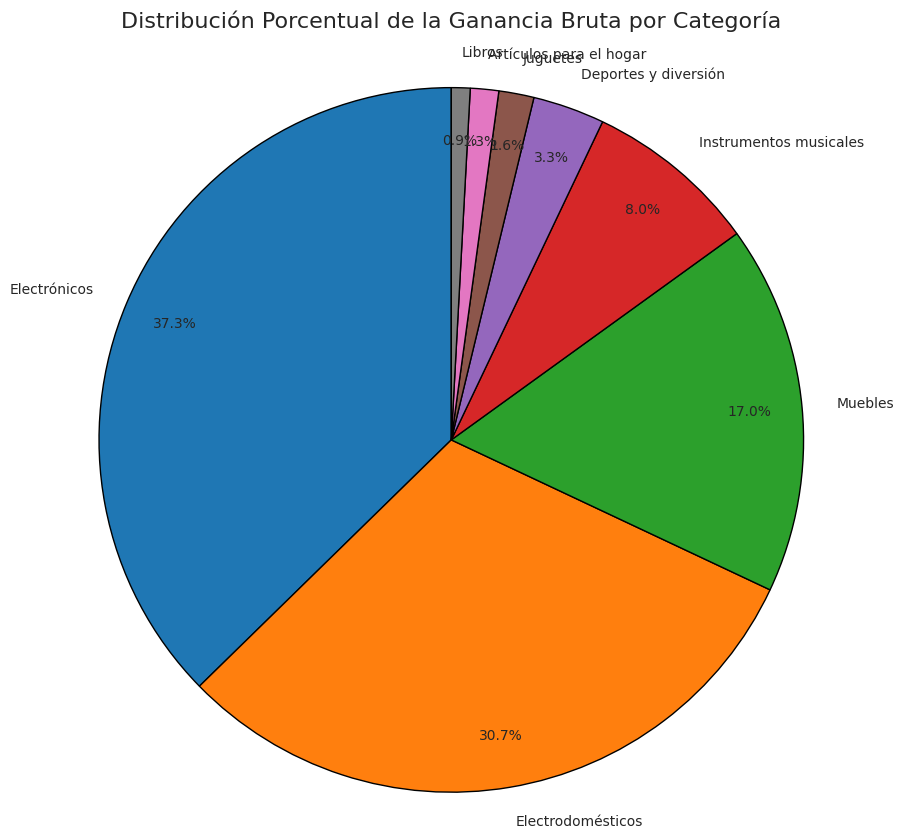

In [45]:
# GRÁFICO DE DISTRIBUCIÓN DE GANANCIAS (GRÁFICO DE TORTA)
# ----------------------------------------------------

plt.figure(figsize=(10, 10))

# Usamos el porcentaje_ganancia calculado antes
plt.pie(
    porcentaje_ganancia,
    labels=porcentaje_ganancia.index,
    autopct='%1.1f%%', # Formato para mostrar el porcentaje con un decimal
    startangle=90,
    pctdistance=0.85, # Distancia del texto del porcentaje desde el centro
    wedgeprops={'edgecolor': 'black'} # Borde entre las secciones
)

plt.title('Distribución Porcentual de la Ganancia Bruta por Categoría', fontsize=16, pad=20)
plt.axis('equal') # Para que el gráfico sea un círculo perfecto
plt.show()

Mas del 50% de toda la ganancia viene de dos únicas categorías. El negocio depende mucho de su éxito.

# 3. Calificación promedio de la tienda




In [46]:
# ANÁLISIS DE LA DISTRIBUCIÓN DE CALIFICACIONES POR TIENDA
# ----------------------------------------------------------------

# 1. Agrupar por 'tienda' y luego contar la frecuencia de cada 'Calificación'
# pd.crosstab es ideal para esto: cruza dos columnas y cuenta las ocurrencias
conteo_calificaciones = pd.crosstab(
    df['tienda'],
    df['Calificación'],
    normalize='index' # Usamos normalize='index' para obtener proporciones (porcentajes) por tienda
) * 100 # Multiplicamos por 100 para tener el valor en porcentaje

print("Distribución Porcentual de Calificaciones (por Tienda):")
print(conteo_calificaciones.round(2).astype(str) + ' %')

Distribución Porcentual de Calificaciones (por Tienda):
Calificación        1       2       3        4        5
tienda                                                 
tienda_1      13.52 %  3.65 %  9.24 %  18.82 %  54.77 %
tienda_2      11.57 %  3.94 %  8.86 %  20.43 %  55.19 %
tienda_3      12.59 %  3.35 %  8.18 %   18.4 %  57.48 %
tienda_4      13.15 %   3.6 %  8.91 %  19.21 %  55.13 %


<Figure size 1200x700 with 0 Axes>

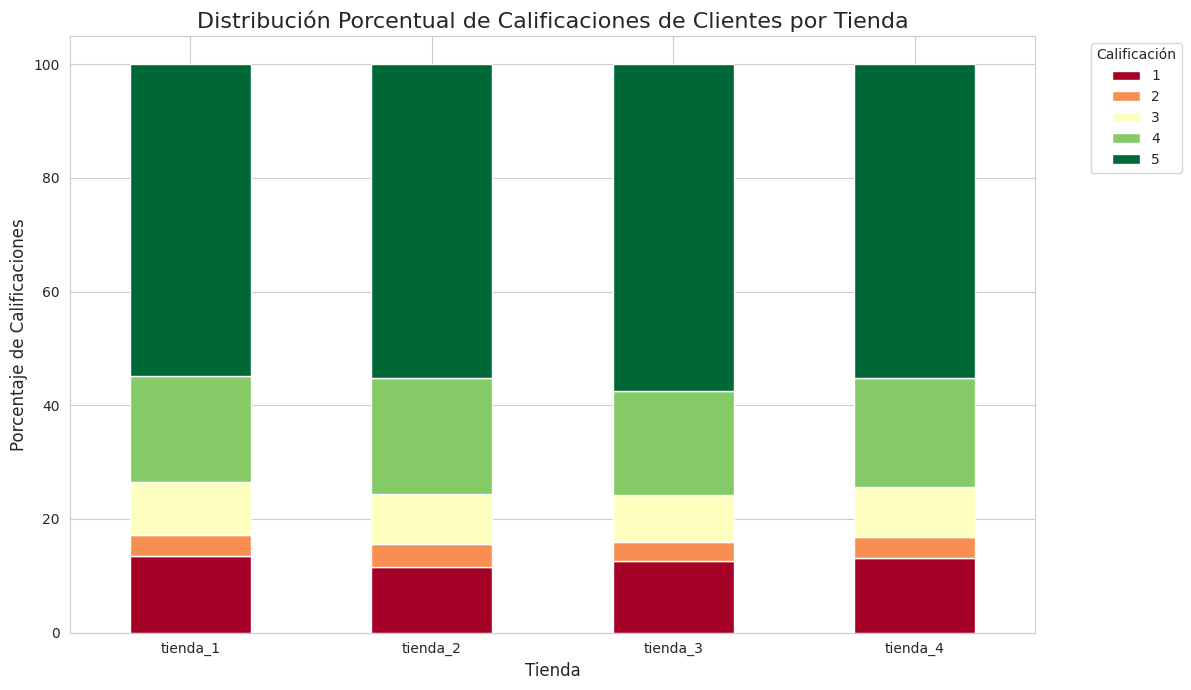

In [47]:
# GRÁFICO DE BARRAS APILADAS DE CALIFICACIONES
# ----------------------------------------------------------------

plt.figure(figsize=(12, 7))

# Crear el gráfico de barras apiladas al 100%
# Usamos el dataframe 'conteo_calificaciones' con el porcentaje de cada nota
conteo_calificaciones.plot(
    kind='bar',
    stacked=True,
    figsize=(12, 7),
    cmap='RdYlGn' # Mapa de color que va de Rojo (malo) a Verde (bueno)
)

plt.title('Distribución Porcentual de Calificaciones de Clientes por Tienda', fontsize=16)
plt.ylabel('Porcentaje de Calificaciones', fontsize=12)
plt.xlabel('Tienda', fontsize=12)
plt.xticks(rotation=0) # Mantiene las etiquetas de la tienda horizontales
plt.legend(title='Calificación', bbox_to_anchor=(1.05, 1), loc='upper left') # Mover la leyenda fuera
plt.tight_layout()
plt.show()

En este caso podemos ver que las 4 tiendas tienen reseñas muy similares

# 4. Productos más y menos vendidos

💰 Top 5 Productos más Valiosos (por Ganancia Bruta Total):
Producto
TV LED UHD 4K       1200721000
Iphone 15           1181672300
Refrigerador        1116986000
Smart TV             793288300
Lavadora de ropa     710992800
Name: Ganancia_Bruta, dtype: int64


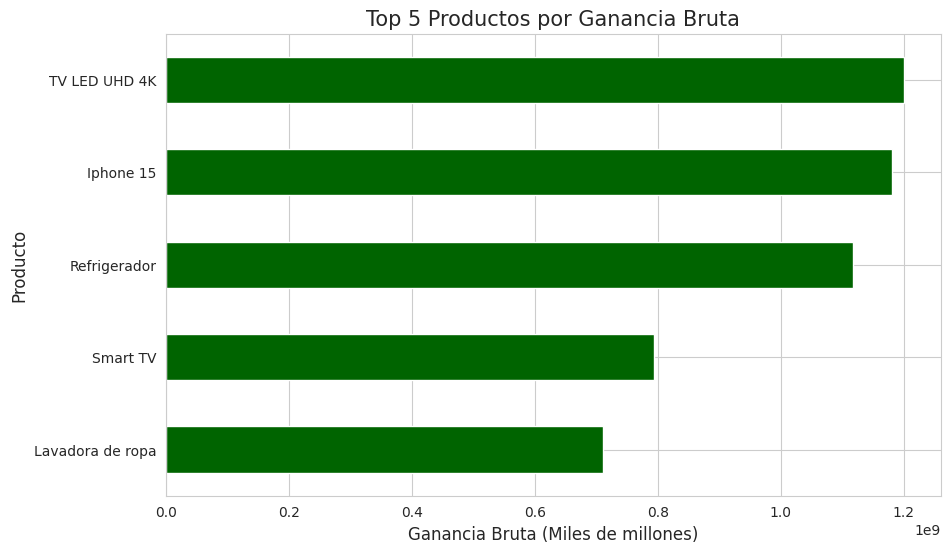

In [48]:
# TOP 5 PRODUCTOS POR GANANCIA BRUTA
# ----------------------------------------------------

# 1. Agrupar la Ganancia Bruta (columna creada previamente) por 'Producto'
ganancia_por_producto = df.groupby('Producto')['Ganancia_Bruta'].sum()

# 2. Seleccionar los 5 productos con la mayor ganancia
top_5_ganancia = ganancia_por_producto.nlargest(5)

print("💰 Top 5 Productos más Valiosos (por Ganancia Bruta Total):")
print(top_5_ganancia.round(0).astype(int))

# 3. Opcional: Graficar el Top 5
plt.figure(figsize=(10, 6))
top_5_ganancia.sort_values(ascending=True).plot(kind='barh', color='darkgreen') # Usamos barh (horizontal)
plt.title('Top 5 Productos por Ganancia Bruta', fontsize=15)
plt.xlabel('Ganancia Bruta (Miles de millones)', fontsize=12)
plt.ylabel('Producto', fontsize=12)
plt.show()


⭐  Productos con la Peor Calificación Promedio:
Producto
Set de vasos                 3.85
Modelado predictivo          3.86
Mesa de centro               3.90
Auriculares con micrófono    3.91
Guitarra acústica            3.91
Name: Calificación, dtype: float64


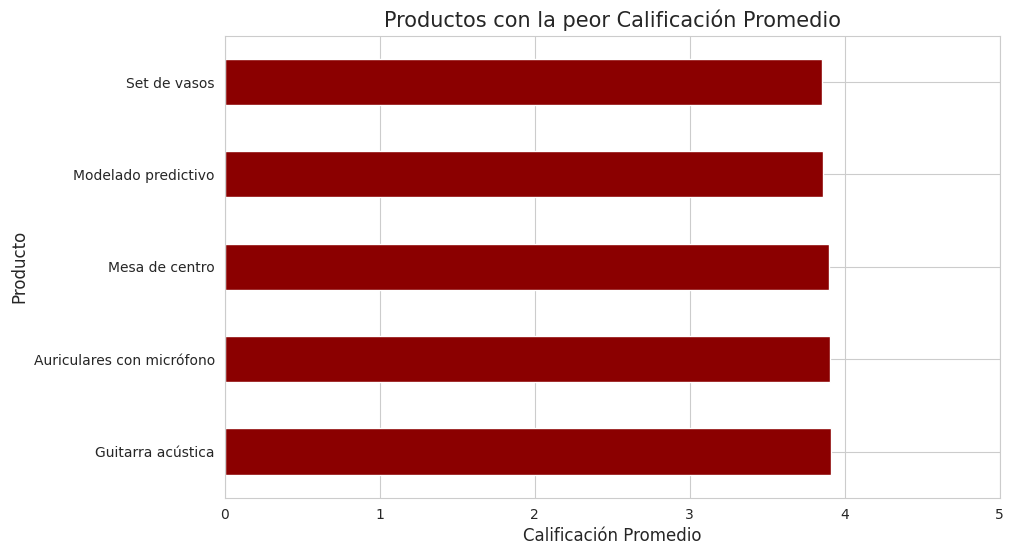

In [36]:
# PRODUCTOS CON LA PEOR CALIFICACIÓN PROMEDIO
# ----------------------------------------------------

# 1. Agrupar la Calificación promedio por 'Producto'
calificacion_por_producto = df.groupby('Producto')['Calificación'].mean()

# 2. Seleccionar los 5 productos con la peor calificación
bottom_5_calificacion = calificacion_por_producto.nsmallest(5)

print("\n⭐  Productos con la Peor Calificación Promedio:")
print(bottom_5_calificacion.round(2))

# 3. Opcional: Graficar el
plt.figure(figsize=(10, 6))
bottom_5_calificacion.sort_values(ascending=False).plot(kind='barh', color='darkred') # Usamos barh (horizontal)
plt.title('Productos con la peor Calificación Promedio', fontsize=15)
plt.xlabel('Calificación Promedio', fontsize=12)
plt.ylabel('Producto', fontsize=12)
plt.xlim(0, 5) # Establecer el límite del eje y en la escala de calificación
plt.show()

Ganancia: El producto TV LED UHD 4K es el que más valor genera. Riesgo: El producto Set de vasos tiene la peor calificación promedio.

# 5. Envío promedio por tienda

In [34]:
# ANÁLISIS DEL IMPACTO DEL COSTO DE ENVÍO EN LA GANANCIA
# ----------------------------------------------------

# 1. Crear una nueva métrica: Porcentaje del Costo de Envío sobre la Ganancia Unitaria
# Evitamos la división por cero usando np.where
# Asumimos que la Ganancia_Unitaria (Precio - Costo de envío) es el denominador.
# Si la Ganancia_Unitaria es 0 o negativa, asignamos un valor alto (ej: 1000) para indicar muy mala eficiencia.
import numpy as np

df['Costo_sobre_Ganancia'] = np.where(
    df['Ganancia_Unitaria'] > 0,
    (df['Costo de envío'] / df['Ganancia_Unitaria']) * 100,
    1000 # Asignamos un 1000% si el costo es mayor o igual a la ganancia unitaria
)

# 2. Calcular el promedio de esta métrica (Costo sobre Ganancia) por Tienda
impacto_envio_promedio = df.groupby('tienda')['Costo_sobre_Ganancia'].mean().sort_values(ascending=False)

print("Impacto Promedio del Costo de Envío en la Ganancia Bruta (Porcentaje):")
print(impacto_envio_promedio.round(2).astype(str) + ' %')

Impacto Promedio del Costo de Envío en la Ganancia Bruta (Porcentaje):
tienda
tienda_2    6.51 %
tienda_1    6.27 %
tienda_4    6.12 %
tienda_3    5.87 %
Name: Costo_sobre_Ganancia, dtype: object


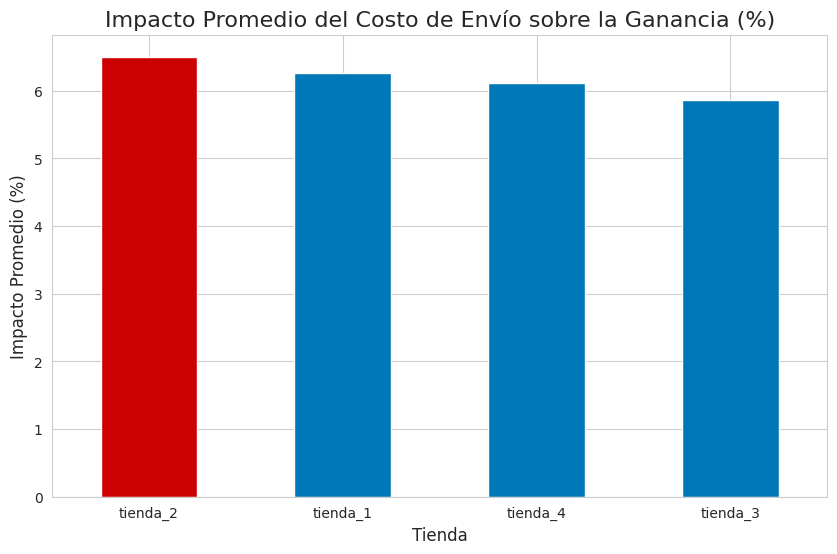

In [35]:
# GRÁFICO DEL IMPACTO PROMEDIO DEL ENVÍO EN LA RENTABILIDAD
# ----------------------------------------------------

plt.figure(figsize=(10, 6))

impacto_envio_promedio.plot(
    kind='bar',
    color=['#CC0000' if x == impacto_envio_promedio.max() else '#0077B6' for x in impacto_envio_promedio] # Colorea de rojo la tienda con mayor impacto
)

plt.title('Impacto Promedio del Costo de Envío sobre la Ganancia (%)', fontsize=16)
plt.ylabel('Impacto Promedio (%)', fontsize=12)
plt.xlabel('Tienda', fontsize=12)
plt.xticks(rotation=0)
plt.show()

# 5. Conclusión General

La recomendación es cerrar la Tienda 4 para liberar capital y recursos que puedan ser invertidos en las tiendas más rentables (Tienda 1 y Tienda 2).

1. Fracaso Financiero (Baja Rentabilidad e Ineficiencia)
La Tienda 4 no cumple con el objetivo principal de generar valor:

Mínima Ganancia: Es la que menos dinero genera de las cuatro tiendas.

Mala Gestión de Costos: A pesar de tener el costo de envío más bajo en números absolutos, es la menos eficiente. El costo de envío se come el mayor porcentaje de su ganancia unitaria, indicando que vende productos de muy bajo margen que no justifican su operación.

2. Riesgo de Reputación (Baja Calidad del Servicio)
La Tienda 4 es una fuente de riesgo para la marca:

Servicio Inconsistente: Es la tienda con la mayor proporción de calificaciones negativas (1 y 2 estrellas). Esto demuestra fallas graves y frecuentes en la experiencia del cliente.

3. Síntesis de la Decisión
La Tienda 4 no solo es la que menos factura y menos gana, sino que su operación es ineficiente y pone en riesgo la reputación de la marca debido a la alta frecuencia de quejas (malas calificaciones).

Cerrar la Tienda 4 es una decisión estratégica que elimina una pérdida continua de recursos y riesgo de reputación, permitiendo enfocar la inversión en las sucursales más exitosas.